# ML Modelling : Regression

## Objectives

### Answer business requirement 1: 
* Using a predictive model to **determine the current Reaming Useful Life (RUL) of any given replaceable part** (in this case an industrial air filter).


## Inputs

* outputs/datasets/transformed/dfTransformedTotal.csv

## Outputs

* Train set (features and target)
* Test set (features and target)
* Validation set (features and target)
* ML pipeline to predict RUL
* Labels map
* Feature Importance Plot



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/filter-maintenance-predictor/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/filter-maintenance-predictor'

---

# Load Data

In [4]:
import pandas as pd

df_total = pd.read_csv(f'outputs/datasets/transformed/dfTransformedTotal.csv')
frame = df_total['Data_No'].iloc[0:len(df_total)]
df_train = df_total[frame < 51].reset_index(drop=True)
df_test = df_total[frame > 50].reset_index(drop=True)
df_total

,Data_No,Differential_pressure,4point_EWM,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,change_DP,change_EWM,mass_g,cumulative_mass_g,Tt,filter_balance
0,1,1.537182,1.046296,0.045257,54.143527,5.5,236.428943,1.025,39.4,0.000000,0.327257,0.242340,13.328682,44.9,99.74
1,1,1.537182,1.242651,0.217247,54.518255,5.6,236.428943,1.025,39.3,0.000000,0.196354,0.242340,13.571021,44.9,99.74
2,1,1.537182,1.360463,0.307825,54.658781,5.7,236.428943,1.025,39.2,0.000000,0.117813,0.242340,13.813361,44.9,99.74
3,1,3.345631,2.154530,0.767573,54.780562,5.8,236.428943,1.025,39.1,1.808449,0.794067,0.242340,14.055701,44.9,99.44
4,1,5.244502,3.390519,1.220983,54.574466,5.9,236.428943,1.025,39.0,1.898871,1.235989,0.242340,14.298040,44.9,99.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69681,100,465.494800,457.888170,6.126625,82.675521,52.0,316.985065,1.200,8.2,6.329500,5.071087,0.380382,197.798681,52.4,22.42
69682,100,464.228900,460.424462,6.132149,82.421873,52.1,316.985065,1.200,8.1,-1.265900,2.536292,0.380382,198.179063,52.4,22.63
69683,100,466.037300,462.669597,6.137013,82.743156,52.2,316.985065,1.200,8.0,1.808400,2.245135,0.380382,198.559445,52.4,22.33
69684,100,472.276500,466.512358,6.145285,82.785427,52.3,316.985065,1.200,7.9,6.239200,3.842761,0.380382,198.939827,52.4,21.29


In [5]:
df_test

,Data_No,Differential_pressure,4point_EWM,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,change_DP,change_EWM,mass_g,cumulative_mass_g,Tt,filter_balance
0,51,2.622251,1.159577,0.148056,55.524146,0.4,236.428943,1.025,58.6,2.622251,0.975116,0.242340,0.969359,36.6,99.56
1,51,3.888165,2.251012,0.811380,55.852018,0.5,236.428943,1.025,58.5,1.265914,1.091435,0.242340,1.211698,36.6,99.35
2,51,4.521122,3.159056,1.150273,56.130203,0.6,236.428943,1.025,58.4,0.632957,0.908044,0.242340,1.454038,36.6,99.25
3,51,4.521122,3.703883,1.309382,56.150070,0.7,236.428943,1.025,58.3,0.000000,0.544826,0.242340,1.696378,36.6,99.25
4,51,4.521122,4.030778,1.393959,56.090457,0.8,236.428943,1.025,58.2,0.000000,0.326896,0.242340,1.938717,36.6,99.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36357,100,465.494800,457.888170,6.126625,82.675521,52.0,316.985065,1.200,8.2,6.329500,5.071087,0.380382,197.798681,52.4,22.42
36358,100,464.228900,460.424462,6.132149,82.421873,52.1,316.985065,1.200,8.1,-1.265900,2.536292,0.380382,198.179063,52.4,22.63
36359,100,466.037300,462.669597,6.137013,82.743156,52.2,316.985065,1.200,8.0,1.808400,2.245135,0.380382,198.559445,52.4,22.33
36360,100,472.276500,466.512358,6.145285,82.785427,52.3,316.985065,1.200,7.9,6.239200,3.842761,0.380382,198.939827,52.4,21.29


### Create a Hybrid Dataframe

Extract bin that reaches **600 pa** of differential pressure or more in **df_train** dataset

In [6]:
dp_total = df_train['Differential_pressure'].map(float).round(decimals=4)
df_train['Differential_pressure'] = dp_total
n = df_train['Differential_pressure'][0:len(df_train)]
df_train_dp = df_train[n >= 600].reset_index(drop=True)
RUL_extract = df_train_dp['Data_No']
RUL_additional = df_train.loc[df_train['Data_No'].isin(RUL_extract)]
RUL_additional

,Data_No,Differential_pressure,4point_EWM,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,change_DP,change_EWM,mass_g,cumulative_mass_g,Tt,filter_balance
8821,11,14.3772,14.377170,2.665642,57.083999,0.1,158.492533,0.9,62.2,14.37717,14.377170,0.142643,0.142643,62.3,97.60
8822,11,13.1113,13.870806,2.629786,56.964773,0.2,158.492533,0.9,62.1,-1.26591,-0.506364,0.142643,0.285287,62.3,97.81
8823,11,15.0101,14.326536,2.662113,57.093926,0.3,158.492533,0.9,62.0,1.89887,0.455730,0.142643,0.427930,62.3,97.50
8824,11,16.2760,15.106337,2.715114,57.252899,0.4,158.492533,0.9,61.9,1.26591,0.779802,0.142643,0.570573,62.3,97.29
8825,11,16.1856,15.538050,2.743292,57.153539,0.5,158.492533,0.9,61.8,-0.09042,0.431713,0.142643,0.713216,62.3,97.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32279,47,594.5276,588.377825,6.377369,59.103897,104.2,79.246266,0.9,0.4,4.34020,4.099850,0.071322,74.317149,104.6,0.91
32280,47,596.4265,591.597295,6.382826,59.377463,104.3,79.246266,0.9,0.3,1.89890,3.219470,0.071322,74.388470,104.6,0.60
32281,47,598.3254,594.288537,6.387365,59.281707,104.4,79.246266,0.9,0.2,1.89890,2.691242,0.071322,74.459792,104.6,0.28
32282,47,599.6817,596.445802,6.390988,58.996220,104.5,79.246266,0.9,0.1,1.35630,2.157265,0.071322,74.531113,104.6,0.05


Include **additional RUL** variables that have a fully completed test cycle to **increase the total data in the modelling dataframe**
Remove NaN Values

In [7]:
df = pd.concat([df_test, RUL_additional], ignore_index=True)
print(df_train.shape, '= df_train')
print(df_test.shape, '= df_test')
print(df.shape, '= df')
df.sort_values('Data_No', ascending=True)

(33324, 15) = df_train
(36362, 15) = df_test
(40112, 15) = df


,Data_No,Differential_pressure,4point_EWM,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,change_DP,change_EWM,mass_g,cumulative_mass_g,Tt,filter_balance
36362,11,14.37720,14.377170,2.665642,57.083999,0.1,158.492533,0.9,62.2,14.37717,14.377170,0.142643,0.142643,62.3,97.60
36774,11,256.52850,259.896386,5.560283,57.558630,41.3,158.492533,0.9,21.0,-7.50510,-2.245258,0.142643,58.911674,62.3,57.25
36775,11,258.42740,259.308792,5.558020,57.723242,41.4,158.492533,0.9,20.9,1.89890,-0.587595,0.142643,59.054318,62.3,56.93
36776,11,260.32620,259.715755,5.559588,57.481806,41.5,158.492533,0.9,20.8,1.89880,0.406963,0.142643,59.196961,62.3,56.61
36777,11,264.03360,261.442893,5.566216,57.448899,41.6,158.492533,0.9,20.7,3.70740,1.727138,0.142643,59.339604,62.3,55.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36059,100,35.71687,34.417504,3.538565,82.979898,22.2,316.985065,1.2,38.0,0.18085,0.866244,0.380382,84.444821,52.4,94.05
36058,100,35.53602,33.551260,3.513074,82.937616,22.1,316.985065,1.2,38.1,1.71802,1.323173,0.380382,84.064439,52.4,94.08
36057,100,33.81800,32.228087,3.472838,82.717792,22.0,316.985065,1.2,38.2,1.26592,1.059942,0.380382,83.684057,52.4,94.36
36068,100,36.98278,36.914036,3.608592,82.650156,23.1,316.985065,1.2,37.1,1.26591,0.045829,0.380382,87.868260,52.4,93.84


# MP Pipeline: Regressor

## Convert Ordinal Numbers into Categorical Values
The target and all requirements are already in a numerical format (float and integer) from our previous engineering steps. 
* **Notwithstanding**; we will convert the **dust type** back into a categorical variable to demonstrate the inclusion of a categorical encoder in each pipeline.
* We will also take the opportunity to remove **data number** from the regression set. 
    * This variable is a category and may confound the results as each RUL measure is within a series of data bins of 'not always complete' tests.

In [8]:
dust = df['Dust'].map(str)
df['Dust'] = dust
df = df.drop(['Data_No'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40112 entries, 0 to 40111
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Differential_pressure  40112 non-null  float64
 1   4point_EWM             40112 non-null  float64
 2   log_EWM                40112 non-null  float64
 3   Flow_rate              40112 non-null  float64
 4   Time                   40112 non-null  float64
 5   Dust_feed              40112 non-null  float64
 6   Dust                   40112 non-null  object 
 7   RUL                    40112 non-null  float64
 8   change_DP              40112 non-null  float64
 9   change_EWM             40112 non-null  float64
 10  mass_g                 40112 non-null  float64
 11  cumulative_mass_g      40112 non-null  float64
 12  Tt                     40112 non-null  float64
 13  filter_balance         40112 non-null  float64
dtypes: float64(13), object(1)
memory usage: 4.3+ MB


## Create ML pipeline

In [9]:
def PipelineOptimization(model):
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['Dust'])),
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(
                                                        variables=['Differential_pressure', '4point_EWM', 'log_EWM',
                                                                'Flow_rate', 'Time', 'Dust_feed',
                                                                'change_DP', 'change_EWM', 'mass_g',
                                                                'cumulative_mass_g', 'Tt','filter_balance'],
                                                        method='spearman',
                                                        threshold=0.6,
                                                        selection_method='variance')),
        ("feat_scaling", MinMaxScaler()),
        ("feat_selection",  SelectFromModel(model)),
        ("model", model),
    ])
    return pipeline_base


Custom Class for hyperparameter optimisation

In [10]:
from sklearn.model_selection import GridSearchCV

class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key])

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score (R²)'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score (R²)': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score',
                   'mean_score (R²)', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches


## Split Train, Test and Validation Sets

Split into 60% Train `|` 20% Test `|` 20% Validate and reset the index of each

In [11]:
from sklearn.model_selection import train_test_split

X_working, X_test, y_working, y_test = train_test_split(
    df.drop(['RUL'], axis=1),
    df['RUL'],
    test_size=0.20,
    random_state=8,
    shuffle=True
)

X_train, X_validate, y_train, y_validate = train_test_split(
    X_working,
    y_working,
    test_size=0.25,
    random_state=8,
    shuffle=True
)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
X_validate = X_validate.reset_index(drop=True)
y_validate = y_validate.reset_index(drop=True)

print('\n', X_train.shape, y_train.shape, '= Train set\n',
      X_validate.shape, y_validate.shape, '= Validation set\n',
      X_test.shape, y_test.shape, '= Test set\n',
      '===========\n',
      df.shape[0], '= Total Observations\n')



 (24066, 13) (24066,) = Train set
 (8023, 13) (8023,) = Validation set
 (8023, 13) (8023,) = Test set
 40112 = Total Observations



In [12]:
X_train

,Differential_pressure,4point_EWM,log_EWM,Flow_rate,Time,Dust_feed,Dust,change_DP,change_EWM,mass_g,cumulative_mass_g,Tt,filter_balance
0,51.902490,54.906465,4.005631,79.857658,59.6,118.214472,1.2,-1.898870,-2.002650,0.141857,84.546990,78.6,91.35
1,45.301650,45.581192,3.819495,80.760268,113.0,59.107236,1.2,-0.090420,-0.186361,0.070929,80.149412,248.2,92.45
2,46.929300,46.417279,3.837672,58.985241,42.1,79.246266,0.9,0.000000,0.341314,0.071322,30.026410,104.6,92.18
3,23.238570,22.370752,3.107754,81.280469,10.3,59.107236,0.9,0.000000,0.578545,0.053197,5.479241,71.9,96.13
4,8.951823,9.762927,2.278592,59.007185,18.6,118.214472,1.025,-1.265917,-0.540736,0.121170,22.537589,43.1,98.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24061,1.808449,2.034976,0.710484,58.107331,9.0,237.738799,1.025,-0.632957,-0.151018,0.243682,21.931404,60.2,99.70
24062,136.176200,135.573613,4.909515,57.213152,30.9,158.492533,0.9,0.632900,0.401725,0.142643,44.076773,62.3,77.30
24063,112.485500,105.498923,4.658701,58.282907,57.4,158.492533,1.025,6.872100,4.657718,0.162455,93.249082,114.5,81.25
24064,533.854200,535.079886,6.282416,81.821577,251.6,59.107236,1.025,-1.265900,-0.817124,0.060585,152.431650,257.9,11.02


## Grid Search CV - Sklearn

### Use default hyperparameters to find most suitable algorithm

In [13]:
from sklearn.ensemble import (
    GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor,
    AdaBoostRegressor, ExtraTreesRegressor
    )
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


models_quick_search = {
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    'LinearRegression': LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "SGDRegressor": SGDRegressor(random_state=0),
    "XGBRegressor": XGBRegressor(random_state=0),
}

params_quick_search = {
    "AdaBoostRegressor": {},
    "DecisionTreeRegressor": {},
    "ExtraTreesRegressor": {},
    "GradientBoostingRegressor": {},
    'LinearRegression': {},
    "RandomForestRegressor": {},
    "SGDRegressor": {},
    "XGBRegressor": {},
}

Do a hyperparameter optimisation search using default hyperparameters

In [14]:
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel


search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for SGDRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Check results

In [16]:
import numpy as np

grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score (R²)')
grid_search_summary

,estimator,min_score,mean_score (R²),max_score,std_score
5,RandomForestRegressor,0.9977,0.997811,0.997933,0.000075
7,XGBRegressor,0.9976,0.997732,0.997795,0.000071
2,ExtraTreesRegressor,0.997549,0.997681,0.997761,0.000076
1,DecisionTreeRegressor,0.997456,0.997563,0.99763,0.000065
3,GradientBoostingRegressor,0.98307,0.98365,0.984069,0.000381
0,AdaBoostRegressor,0.908702,0.913347,0.916311,0.002837
4,LinearRegression,0.740217,0.746417,0.751199,0.00375
6,SGDRegressor,0.74023,0.746307,0.75129,0.003714


The average **R² score** (mean_score) indicates how well a model of the data fits the actual data. 

We note that
* From the **original 6 features**, plus an additional **8 calculated** ones, produces an almost perfect prediction of remaining useful life (RUL).
    * R² score ranges from **0.74** to **0.99**, which is exceptional, as value of 1 represents a perfect fit.
    * This is result is exceptional, however unusual and requires further investigation.
    * The natural inter-correlation of the calculated requirements may be influencing the models score, so we will exclude these for further review.
* The **Random Forest Regressor** looks to be the best performing model among the 7 reviewed at this stage.

---

## Exclude Calculated Requirements
These are naturally be cross correlated to the base requirement they are calculated and may unduly skew the model.

In [17]:
df.head(3)

,Differential_pressure,4point_EWM,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,change_DP,change_EWM,mass_g,cumulative_mass_g,Tt,filter_balance
0,2.622251,1.159577,0.148056,55.524146,0.4,236.428943,1.025,58.6,2.622251,0.975116,0.24234,0.969359,36.6,99.56
1,3.888165,2.251012,0.811380,55.852018,0.5,236.428943,1.025,58.5,1.265914,1.091435,0.24234,1.211698,36.6,99.35
2,4.521122,3.159056,1.150273,56.130203,0.6,236.428943,1.025,58.4,0.632957,0.908044,0.24234,1.454038,36.6,99.25


Consolidate columns required in **Dataframe**, **Train**, **Test** & **Validation** Sets

In [18]:
columns_req = ['Differential_pressure', 'Flow_rate', 'Time', 'Dust_feed', 'Dust', 'RUL']
df = df.filter(columns_req)
X_train = X_train.filter(columns_req)
X_validate = X_validate.filter(columns_req)
X_test = X_test.filter(columns_req)

print('\n', X_train.shape, y_train.shape, '= Train set\n',
      X_validate.shape, y_validate.shape, '= Validate set\n',
      X_test.shape, y_test.shape, '= Test set\n',
      '===========\n',
      df.shape[0], '= Total Observations\n')
      
df.head(3)


 (24066, 5) (24066,) = Train set
 (8023, 5) (8023,) = Validate set
 (8023, 5) (8023,) = Test set
 40112 = Total Observations



,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,2.622251,55.524146,0.4,236.428943,1.025,58.6
1,3.888165,55.852018,0.5,236.428943,1.025,58.5
2,4.521122,56.130203,0.6,236.428943,1.025,58.4


## Save for Later
We will take the opportunity to save this **hybrid dataframe** for use in the **feature study** section that looks to answer **business requirement 2**.

In [19]:
df_export = df.copy()
dust_density = ['ISO 12103-1, A2 Fine Test Dust' if n == '0.9' else ('ISO 12103-1, A3 Medium Test Dust' if n == '1.025' else 'ISO 12103-1, A4 Coarse Test Dust') for n in df_export['Dust']]
df_export['Dust'] = dust_density
df_export.to_csv(f'outputs/datasets/transformed/dfCombinedHybrid.csv',index=False)
df_export.head(3)

,Differential_pressure,Flow_rate,Time,Dust_feed,Dust,RUL
0,2.622251,55.524146,0.4,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.6
1,3.888165,55.852018,0.5,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.5
2,4.521122,56.130203,0.6,236.428943,"ISO 12103-1, A3 Medium Test Dust",58.4


Simple check to see all dust values have been converted

In [20]:
df_export.Dust.unique().reshape(-1).tolist()

['ISO 12103-1, A3 Medium Test Dust',
 'ISO 12103-1, A2 Fine Test Dust',
 'ISO 12103-1, A4 Coarse Test Dust']

## Re-Define the Pipeline

In [21]:
def PipelineOptimization(model):
    pipeline_base = Pipeline([

        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['Dust'])),
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(
                                                        variables=['Differential_pressure',
                                                                'Flow_rate', 'Time', 'Dust_feed'],
                                                        method="spearman",
                                                        threshold=0.6,
                                                        selection_method="variance")),
        ("feat_scaling", MinMaxScaler()),
        ("feat_selection",  SelectFromModel(model)),
        ("model", model),
    ])

    return pipeline_base

Re-Run hyperparameter optimization search using default hyperparameters **on less variables**.

In [22]:
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for SGDRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Check Results

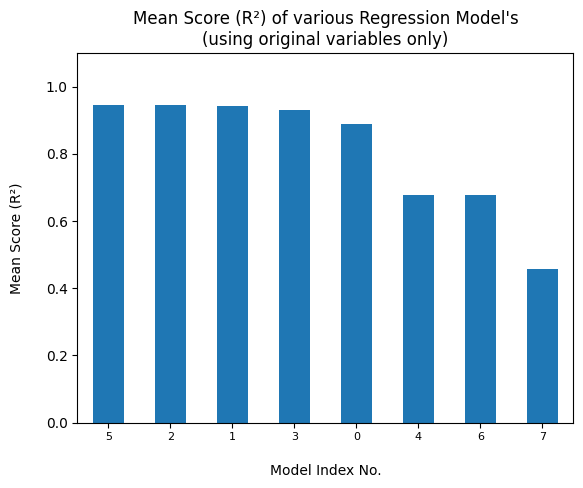

,estimator,min_score,mean_score (R²),max_score,std_score
5,RandomForestRegressor,0.941372,0.946047,0.949525,0.002704
2,ExtraTreesRegressor,0.93973,0.943823,0.946171,0.002178
1,DecisionTreeRegressor,0.93589,0.940947,0.944584,0.002831
3,GradientBoostingRegressor,0.926112,0.929523,0.933444,0.002857
0,AdaBoostRegressor,0.88124,0.88886,0.896058,0.005591
4,LinearRegression,0.672813,0.677903,0.682857,0.003872
6,SGDRegressor,0.67289,0.677875,0.682863,0.003803
7,XGBRegressor,0.451654,0.457995,0.463508,0.004693


In [24]:
import matplotlib.pyplot as plt

grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score (R²)')
results = grid_search_summary['mean_score (R²)']
results.plot(kind="bar",title="Mean Scores (R²)")

axes = plt.gca()
axes.set_ylim([0,1.1])
plt.xticks(rotation=0, fontsize=8)

plt.title("Mean Score (R²) of various Regression Model's\n(using original variables only)")
plt.ylabel('Mean Score (R²)\n')
plt.xlabel('\nModel Index No.')
plt.show()
grid_search_summary

### Observations
* From the **original 6 features** maintains the almost perfect prediction of remaining useful life (RUL) for most regression models.
    * R² score ranges from ±**0.45** to ±**0.95**.
    * We see a slight reduction of the scores across all tests, which is understandable considering the removal of possibly cross correlated calculated variables.
    * There is negligible difference between the top 3 ranked models.

* The **Random Forest Regressor** remains the best performing model with an R² of **0.948985**.
    * This is result is exceptional.
    * High R² Scores are unusual and will require further investigation.

* The R² score of the top 5 ranked estimators is much higher than the **0.7** tolerance we decided in the business case.
    * We could use this information to feedback to the business team to review the business model.
    * A tolerance level between **0.85** to **0.95** or higher may be suitable for this dataset / business case.
    * At the high performance levels seen in a variety of models, the **speed of calculating each model** may also be a further consideration for the business team.

## Optimal **hyperparameter configuration** of the most suitable model
Here we will perform an extensive grid search on the most suitable model to find the optimal combination of hyper-parameters.

First step is to define the model and parameters for the extensive search

#### Random Forest Regressor

In [25]:
# documentation to help on hyperparameter list: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

models_search = {
    'RandomForestRegressor': RandomForestRegressor(),
}

params_search = {
    'RandomForestRegressor':{
        'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'model__max_features': [1.0, 'sqrt', 'log2'],
        'model__n_estimators': [100,300,600],
    }
}

Extensive GridSearch CV

In [26]:
search_regr = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search_regr.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/workspace/.pip-modules/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Check results

In [27]:
grid_search_summary, grid_search_pipelines = search_regr.score_summary(sort_by='mean_score (R²)')
grid_search_summary

,estimator,min_score,mean_score (R²),max_score,std_score,model__criterion,model__max_features,model__n_estimators
4,RandomForestRegressor,0.941396,0.946277,0.949631,0.00279,squared_error,sqrt,300
7,RandomForestRegressor,0.941409,0.946264,0.949522,0.002768,squared_error,log2,300
22,RandomForestRegressor,0.94155,0.946263,0.949559,0.002707,friedman_mse,sqrt,300
35,RandomForestRegressor,0.941403,0.946263,0.949601,0.002778,poisson,log2,600
5,RandomForestRegressor,0.941351,0.946248,0.949639,0.002807,squared_error,sqrt,600
6,RandomForestRegressor,0.941509,0.946245,0.949564,0.002725,squared_error,log2,100
20,RandomForestRegressor,0.941464,0.94624,0.949617,0.002736,friedman_mse,1.0,600
31,RandomForestRegressor,0.94145,0.946238,0.949516,0.00274,poisson,sqrt,300
29,RandomForestRegressor,0.941502,0.946237,0.949606,0.002709,poisson,1.0,600
23,RandomForestRegressor,0.941484,0.946233,0.949496,0.002728,friedman_mse,sqrt,600


---

#### Check the best model

In [32]:
best_model = grid_search_summary.iloc[0, 0]
best_model

'RandomForestRegressor'

Hyperparameters for best model

In [33]:
best_parameters = grid_search_pipelines[best_model].best_params_
best_parameters

{'model__criterion': 'squared_error',
 'model__max_features': 'sqrt',
 'model__n_estimators': 300}

Define the best regressor, based on search

In [34]:
best_regressor_pipeline = grid_search_pipelines[best_model].best_estimator_
best_regressor_pipeline

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Dust'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['Differential_pressure',
                                                     'Flow_rate', 'Time',
                                                     'Dust_feed'])),
                ('feat_scaling', MinMaxScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor())),
                ('model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=300))])

## Assess feature importance

Recall best Parameters

In [35]:
best_parameters

{'model__criterion': 'squared_error',
 'model__max_features': 'sqrt',
 'model__n_estimators': 300}

Manually define these into the best model

In [ ]:
stop

In [37]:
reg_model = RandomForestRegressor(
    criterion='squared_error',
    max_features='sqrt',
    n_estimators=300,
    )
reg_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=300)

Visualize results

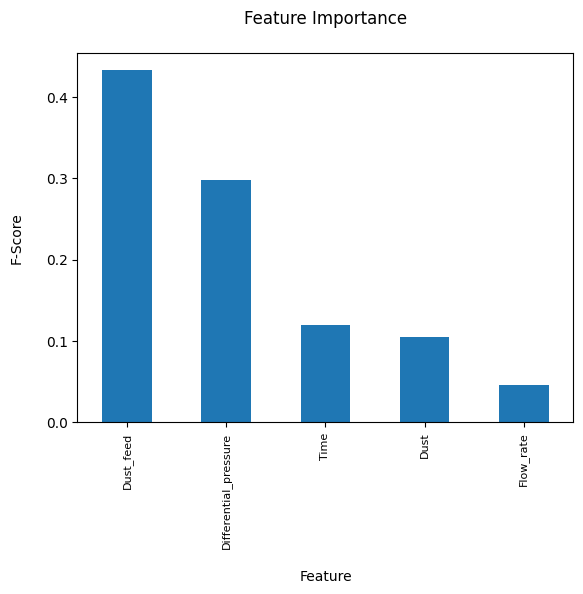

In [38]:
feat_importances = (pd.Series(reg_model.feature_importances_, index=X_train.columns)
                    .nlargest(6)
                    .plot(kind='bar'))
plt.xticks(fontsize=8)
plt.title('Feature Importance\n')
plt.ylabel("F-Score\n")
plt.xlabel('\nFeature')
plt.show()

#### Observations
* From the 6 original features, we dropped `Data_No` as it is a catagorical variable that arbitrarily describes the test number and has no relation to the patterns seen in the dataset.
* Among the remaing 5 variables, 2 show higher relevance to predict Remaining Useful Life (RUL) that the others
    * `Dust Feed` and `Differential Pressure`

---

## Evaluate Regressor Performance on Train and Test Sets

Compute a performance metric on the data held out for testing, **df_test**
* [R² score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) (also called Coefficient of Determination)
* [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) (MAE)
* [Median Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html) (MdAE)
* [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (MSE)
* Root Mean Squared Error (RMSE).

We could also consider:
* Almost Correct Predictions Error Rate (ACPER)
* Mean Absolute Percentage Error (MAPE) and 
* Adjusted R² Score 
    * _((1 - R²) * (sample_size - 1)) * -1 / (sample_size - no_independent_features - 1))_

Define Evaluation Functions

In [39]:
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    median_absolute_error
    )
import numpy as np
import seaborn as sns

def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)


def regression_evaluation(X, y, pipeline):
    prediction = pipeline.predict(X)
    print('R² Score:', r2_score(y, prediction).round(4))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(4))
    print('Median Absolute Error:', median_absolute_error(y, prediction).round(4))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(4))
    print('Root Mean Squared Error:', np.sqrt(
        mean_squared_error(y, prediction)).round(4))
    print("\n")


def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")

    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")
    plt.savefig(f'deployed/reg_eval_plot.png', bbox_inches='tight')

    plt.show()


Run Performance Evaluation

Model Evaluation 

* Train Set
R² Score: 0.9706
Mean Absolute Error: 7.3058
Median Absolute Error: 3.9121
Mean Squared Error: 142.5984
Root Mean Squared Error: 11.9415


* Test Set
R² Score: 0.9479
Mean Absolute Error: 10.0049
Median Absolute Error: 5.8982
Mean Squared Error: 247.9163
Root Mean Squared Error: 15.7454




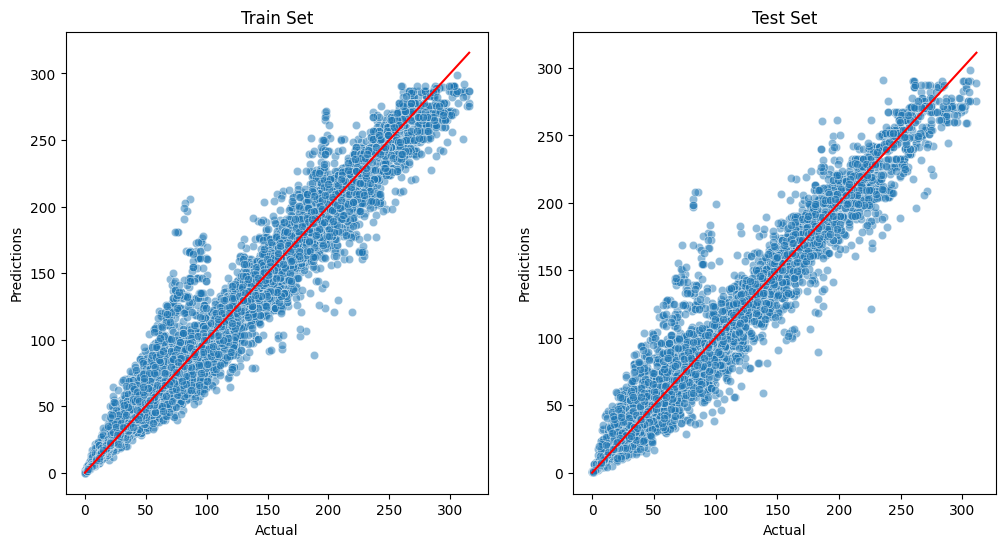

In [41]:
regression_performance(X_train, y_train, X_test, y_test, best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_regressor_pipeline)

In [42]:
best_regressor_pipeline

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Dust'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['Differential_pressure',
                                                     'Flow_rate', 'Time',
                                                     'Dust_feed'])),
                ('feat_scaling', MinMaxScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor())),
                ('model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=300))])

#### Observations
* The pipeline performance (R² Score) Train set: ±**0.97** and Test set: ±**0.95**.
* The represents a very high performance of the model to predict remaining useful life.
* This is much higher than the current business requirement is an R² Score of 0.7 or higher.
* Our hyperparameter combination exceeds our performance criteria.

Additionally:
* The predictions tend to follow the actual values.
* We initially added more hyperparameters in the extensive search.
* Optimal hyperparameter combinations were chosen to train all possible models more quickly.
* We see a few outliers in the supplied dataset that tend to mirror each other, reflecting the sourcing of train, test data from the same data bins.

#### Considerations
* Due to the high performance of this model, additional hyperparameters are not warranted to increase performance in this case.
* We could replace the **feature selection step** in the model pipeline for a **PCA (Principal Component Analysis) step** to select variables according to the magnitude (from largest to smallest in absolute values) of their coefficients (loadings).
    * In this case, we already have a small number of attributes and performance exceeds the current business case requirement, so a PCA is not warranted, however;
    * To **demonstrate the process** we will perform a PCA and **highlight any changes** that occur in performance.

Next:
* Refit our ML Pipeline with a PCA.


---

# Regressor with PCA

Review PCA separately to the scaled data

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', RandomForestRegressor())])
pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)
print(f'RandomForrestRegression (defaults): {r2}')

RandomForrestRegression (defaults): 0.994567904028159


In [44]:
pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', RandomForestRegressor(
    criterion='squared_error',
    max_features='sqrt',
    n_estimators=300,
))])
pipeline.fit(X_train, y_train)

r2 = pipeline.score(X_test, y_test)
print(f'RandomForrestRegression (custom x 3): {r2}')

RandomForrestRegression (custom x 3): 0.9943582212920443


* All components explain ±**99%** of the data 
* Just 3 of these components also explain **99%** of the data

## Rewrite ML Pipeline for Modelling

In [48]:
from sklearn.decomposition import PCA

n_components = 3

def PipelineOptimization(model):
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['Dust'])),
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(
                                                        variables=['Differential_pressure',
                                                                'Flow_rate', 'Time', 'Dust_feed'],
                                                        method="spearman",
                                                        threshold=0.6,
                                                        selection_method="variance")),
        ("feat_scaling", MinMaxScaler()),
        ("PCA", PCA(n_components=n_components, random_state=0)),
        ("model", model),
    ])

    return pipeline_base

## Grid Search CV – Sklearn

In [49]:
print('Summary:\n', X_train.shape, y_train.shape, '= Train set\n', X_test.shape, y_test.shape, '= Test set')

Summary:
 (24066, 5) (24066,) = Train set
 (8023, 5) (8023,) = Test set


### Use standard hyperparameters to find the most suitable model.

In [50]:
models_quick_search = {
    "AdaBoostRegressor": AdaBoostRegressor(random_state=0),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=0),
    "ExtraTreesRegressor": ExtraTreesRegressor(random_state=0),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=0),
    'LinearRegression': LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(random_state=0),
    "SGDRegressor": SGDRegressor(random_state=0),
    "XGBRegressor": XGBRegressor(random_state=0),
}

params_quick_search = {
    "AdaBoostRegressor": {},
    "DecisionTreeRegressor": {},
    "ExtraTreesRegressor": {},
    "GradientBoostingRegressor": {},
    'LinearRegression': {},
    "RandomForestRegressor": {},
    "SGDRegressor": {},
    "XGBRegressor": {},
}

Do a quick optimisation search 

In [51]:
quick_search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
quick_search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for SGDRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Check results

In [52]:
grid_search_summary_PCA, grid_search_pipelines_PCA = quick_search.score_summary(sort_by='mean_score (R²)')
grid_search_summary_PCA

,estimator,min_score,mean_score (R²),max_score,std_score
5,RandomForestRegressor,0.982983,0.983531,0.984905,0.000699
2,ExtraTreesRegressor,0.982359,0.983206,0.984047,0.000711
7,XGBRegressor,0.981184,0.982401,0.9838,0.000875
1,DecisionTreeRegressor,0.971492,0.972331,0.974257,0.001015
3,GradientBoostingRegressor,0.93101,0.940408,0.947156,0.005614
0,AdaBoostRegressor,0.81376,0.837686,0.858103,0.015954
4,LinearRegression,0.491647,0.497345,0.500347,0.00347
6,SGDRegressor,0.491593,0.497294,0.500046,0.003412


### Do an extensive search on the most suitable model to find the best hyperparameter configuration.

Define model and parameters for extensive search

In [55]:
# documentation to help on hyperparameter list: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

models_search = {
    'RandomForestRegressor': RandomForestRegressor(),
}

params_search = {
    'RandomForestRegressor':{
        'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'model__max_features': [1.0, 'sqrt', 'log2'],
        'model__n_estimators': [100,300,600],
    }
}

Extensive GridSearch CV

In [56]:
search_PCA = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search_PCA.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/workspace/.pip-modules/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Check results

In [57]:
grid_search_summary_PCA, grid_search_pipelines_PCA = search_PCA.score_summary(sort_by='mean_score (R²)')
grid_search_summary_PCA

,estimator,min_score,mean_score (R²),max_score,std_score,model__criterion,model__max_features,model__n_estimators
28,RandomForestRegressor,0.983481,0.983998,0.985068,0.000626,poisson,1.0,300
29,RandomForestRegressor,0.983424,0.983989,0.985069,0.000647,poisson,1.0,600
17,RandomForestRegressor,0.98317,0.983893,0.984986,0.000713,absolute_error,log2,600
14,RandomForestRegressor,0.983077,0.983883,0.985012,0.000718,absolute_error,sqrt,600
13,RandomForestRegressor,0.983218,0.983867,0.984836,0.000648,absolute_error,sqrt,300
27,RandomForestRegressor,0.983275,0.983863,0.984872,0.0006,poisson,1.0,100
16,RandomForestRegressor,0.983193,0.983854,0.984926,0.000724,absolute_error,log2,300
11,RandomForestRegressor,0.983268,0.98379,0.985086,0.000658,absolute_error,1.0,600
10,RandomForestRegressor,0.983278,0.983782,0.985087,0.000664,absolute_error,1.0,300
9,RandomForestRegressor,0.9833,0.983753,0.985059,0.000658,absolute_error,1.0,100


Check the best model

In [58]:
best_model = grid_search_summary_PCA.iloc[0,0]
best_model

'RandomForestRegressor'

Parameters for best model

In [59]:
best_parameters = grid_search_pipelines_PCA[best_model].best_params_
best_parameters

{'model__criterion': 'poisson',
 'model__max_features': 1.0,
 'model__n_estimators': 300}

Define the best regressor

In [60]:
best_regressor_pipeline = grid_search_pipelines_PCA[best_model].best_estimator_
best_regressor_pipeline

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Dust'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['Differential_pressure',
                                                     'Flow_rate', 'Time',
                                                     'Dust_feed'])),
                ('feat_scaling', MinMaxScaler()),
                ('PCA', PCA(n_components=3, random_state=0)),
                ('model',
                 RandomForestRegressor(criterion='poisson', n_estimators=300))])

Visualize most important features

In [66]:
reg_model = RandomForestRegressor(
    criterion='poisson',
    max_features=1.0,
    n_estimators=300,
    )
reg_model.fit(X_train, y_train)

RandomForestRegressor(criterion='poisson', n_estimators=300)

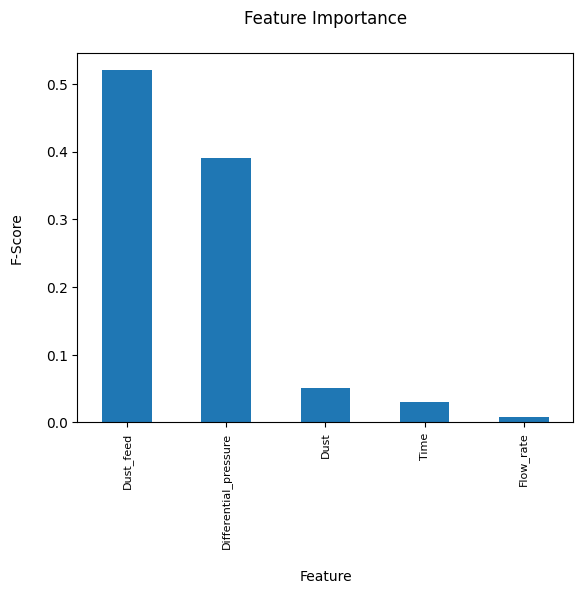

In [67]:
feat_importances = (pd.Series(reg_model.feature_importances_, index=X_train.columns)
                    .nlargest(6)
                    .plot(kind='bar'))
plt.xticks(fontsize=8)
plt.title('Feature Importance\n')
plt.ylabel("F-Score\n")
plt.xlabel('\nFeature')
plt.show()

## Evaluate Regressor on Train and Tests Sets

Model Evaluation 

* Train Set
R² Score: 0.9976
Mean Absolute Error: 1.945
Median Absolute Error: 0.8023
Mean Squared Error: 11.6625
Root Mean Squared Error: 3.415


* Test Set
R² Score: 0.9851
Mean Absolute Error: 4.9585
Median Absolute Error: 2.1537
Mean Squared Error: 71.1426
Root Mean Squared Error: 8.4346




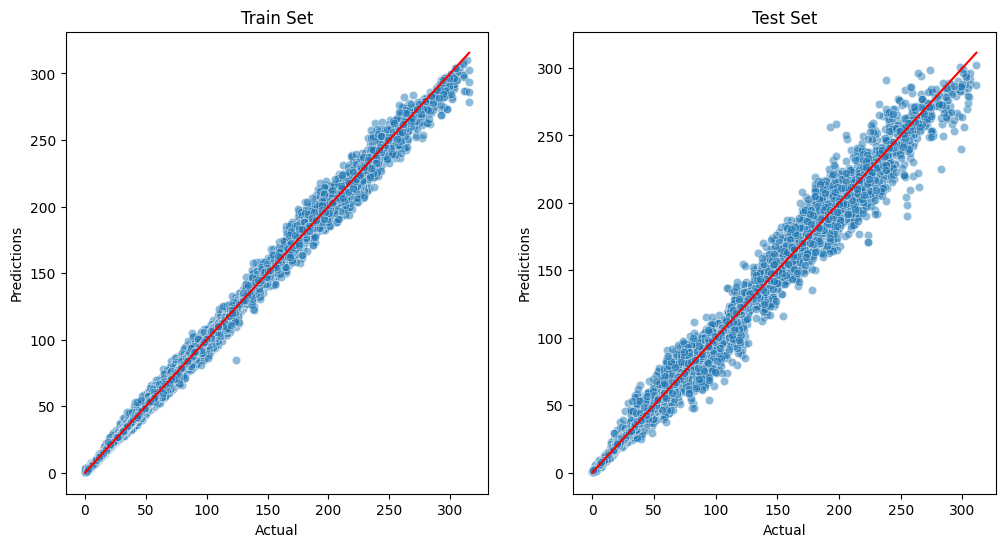

In [68]:
regression_performance(X_train, y_train, X_test, y_test, best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_regressor_pipeline)

# Cross Validation

The training accuracy is **99%** and testing accuracy is **98%**.
* The model is considered to fit "almost" perfectly on the training and testing datasets with the R² Score approaching 1.

As this is an exceptional case, and for the **purposes of demonstration**, we will undertake a Cross Validation step to demonstrate how we ensure that we do not '**overfit**' and our model fits the data accurately.
* If the testing dataset performed poorly, this would be called **overfitting**.
* In this scenario, the model would learn well on training data however it will **generalize on new data**. 
* When test loss increases as we keep improving training loss, this leads to overfitting.

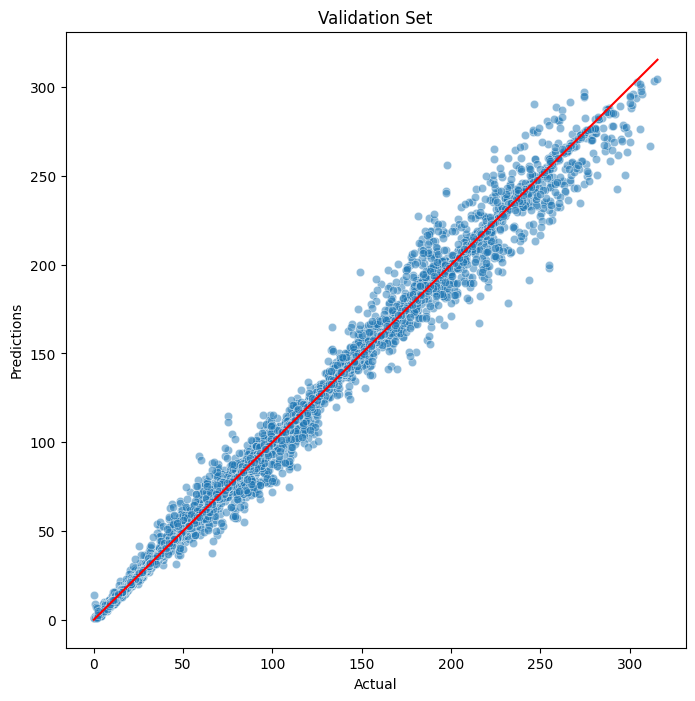

In [69]:
from sklearn.model_selection import cross_val_predict

# predicted values against the actual values
y_pred = cross_val_predict(reg_model, X_validate, y_validate, cv=5)

# Plot the predicted values against the actual values & save image
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
sns.scatterplot(x=y_validate, y=y_pred, alpha=0.5, ax=axes)
sns.lineplot(x=y_validate, y=y_validate, color='red', ax=axes)
axes.set_xlabel('Actual')
axes.set_ylabel('Predictions')
axes.set_title('Validation Set')

plt.savefig(f'deployed/cross_val_plot.png', bbox_inches='tight')
plt.show()

# Which pipeline to choose?

We fitted the following pipelines:
* Random Forest Regression (with all variables)
* Random Forest Regression (with original 6 variables)
* Random Forest Regression with PCA
<!-- * Classifier -->

### Observations
All the regressor pipelines exceeded the expected performance threshold (0.7 R² score) for the train and test set.
The 

The Importance of features changed between Regression vs Regression + PCA processes:
* 3 pipeline components explain more than 90% of the data and improves the performance of the model.
* The `max_features` component changes from `log3` to `sqrt` improving all measures of performance.
* The `n_components` component changed from `800` to `400` improving all measures of performance.
* The R² Score is moderately improved.
* Error rates significantly decrease across both **train** and **test** sets.

|| Performance Measure | Regressor | Regressor + PCA |
|---|---|---|---|
|**Train Set**|R² Score:|± 0.97|± 0.99|
||Mean Absolute Error:|± 6.66|± 1.75|
||Median Absolute Error:|± 3.70|± 0.71|
||Mean Squared Error:|± 111.80|± 9.62|
||Root Mean Squared Error:|± 10.57|± 3.10|
|||||
|**Test Set**|R² Score:|± 0.95|± 0.98|
||Mean Absolute Error:|± 9.49|± 4.46|
||Median Absolute Error:|± 5.48|± 1.81|
||Mean Squared Error:|± 227.77|± 61.71|
||Root Mean Squared Error:|± 15.09|± 7.86|

In [70]:
best_regressor_pipeline

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Dust'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['Differential_pressure',
                                                     'Flow_rate', 'Time',
                                                     'Dust_feed'])),
                ('feat_scaling', MinMaxScaler()),
                ('PCA', PCA(n_components=3, random_state=0)),
                ('model',
                 RandomForestRegressor(criterion='poisson', n_estimators=300))])

# Refit pipeline with best features

## Rewrite Pipeline

In [71]:
n_components = 3

def PipelineOptimization(model):
    pipeline_base = Pipeline([
        ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
                                                     variables=['Dust'])),
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(
                                                        variables=['Differential_pressure','Dust_feed', 'Time'],
                                                        method="spearman",
                                                        threshold=0.6,
                                                        selection_method="variance")),
        ("feat_scaling", MinMaxScaler()),
         ("feat_selection",  SelectFromModel(model)),
        ("model", model),
    ])
    return pipeline_base


## Consolidate Dataset, Train, Test and Validation Set, only with best features

In [72]:
columns_req = ['Differential_pressure', 'Flow_rate', 'Time', 'Dust_feed', 'Dust']
df = df.filter(columns_req)
X_train = X_train.filter(columns_req)
X_validate = X_validate.filter(columns_req)
X_test = X_test.filter(columns_req)

print('\n', X_train.shape, y_train.shape, '= Train set\n',
      X_validate.shape, y_validate.shape, '= Validate set\n',
      X_test.shape, y_test.shape, '= Test set\n',
      '===========\n',
      df.shape[0], '= Total Observations\n')
      
X_train.head(3)


 (24066, 5) (24066,) = Train set
 (8023, 5) (8023,) = Validate set
 (8023, 5) (8023,) = Test set
 40112 = Total Observations



,Differential_pressure,Flow_rate,Time,Dust_feed,Dust
0,51.90249,79.857658,59.6,118.214472,1.2
1,45.30165,80.760268,113.0,59.107236,1.2
2,46.92930,58.985241,42.1,79.246266,0.9


Subset Best Features

In [73]:
best_model

'RandomForestRegressor'

In [ ]:
best_parameters

{'model__criterion': 'poisson',
 'model__max_features': 1.0,
 'model__n_estimators': 300}

In [74]:
best_regressor_pipeline

Pipeline(steps=[('OrdinalCategoricalEncoder',
                 OrdinalEncoder(encoding_method='arbitrary',
                                variables=['Dust'])),
                ('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['Differential_pressure',
                                                     'Flow_rate', 'Time',
                                                     'Dust_feed'])),
                ('feat_scaling', MinMaxScaler()),
                ('PCA', PCA(n_components=3, random_state=0)),
                ('model',
                 RandomForestRegressor(criterion='poisson', n_estimators=300))])

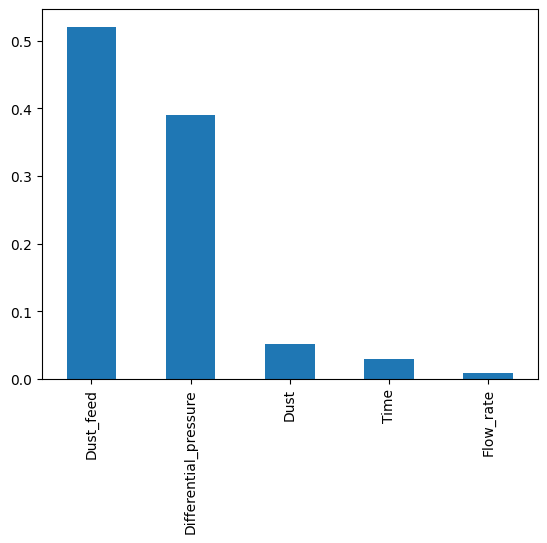

In [76]:
reg_model = RandomForestRegressor(
    criterion='poisson',
    n_estimators=300,
    )
reg_model.fit(X_train, y_train)
feat_importances = (pd.Series(reg_model.feature_importances_, index=X_train.columns)
                    .nlargest(6)
                    .plot(kind='bar'))

Consolidate **Train**, **Test** and **Validation** data by top 3 feature importance

In [77]:
n_features = 3
best_features = pd.Series(reg_model.feature_importances_, index=X_train.columns).nlargest(n_features).index.to_list()
X_train = X_train.filter(best_features)
X_test = X_test.filter(best_features)
X_validate = X_validate.filter(best_features)

print('Summary:\n', X_train.shape, y_train.shape,'= Train set\n',
        X_validate.shape, y_validate.shape, '= Validation set\n',
        X_test.shape, y_test.shape, '= Test set\n')
X_train.head(6)

Summary:
 (24066, 3) (24066,) = Train set
 (8023, 3) (8023,) = Validation set
 (8023, 3) (8023,) = Test set



,Dust_feed,Differential_pressure,Dust
0,118.214472,51.902490,1.2
1,59.107236,45.301650,1.2
2,79.246266,46.929300,0.9
3,59.107236,23.238570,0.9
4,118.214472,8.951823,1.025
5,59.107236,219.817000,1.2


In [78]:
best_features

['Dust_feed', 'Differential_pressure', 'Dust']

## Grid Search CV – Sklearn

Define Pipeline

In [79]:
n_components = 2

def PipelineOptimization(model):
    pipeline_base = Pipeline([
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(
                                                        variables=['Differential_pressure','Dust_feed'],
                                                        method="spearman",
                                                        threshold=0.6,
                                                        selection_method="variance")),
        ("feat_scaling", MinMaxScaler()),
        ("feat_selection",  SelectFromModel(model)),
        ("model", model),
    ])
    return pipeline_base

We are using the same model from the previous GridCV search

In [80]:
models_search

{'RandomForestRegressor': RandomForestRegressor()}

And the best parameters from the previous GridCV search

In [ ]:
best_parameters

{'model__criterion': 'poisson',
 'model__max_features': 1.0,
 'model__n_estimators': 300}

Include manually

In [ ]:
stop

In [83]:
models_search = {
    'RandomForestRegressor': RandomForestRegressor(),
}

params_search = {
    'RandomForestRegressor':{
        'model__criterion': ['poisson'],
        'model__max_features': [1.0],
        'model__n_estimators': [300],
    }
}

GridSearch CV

In [84]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits



Check results

In [85]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score (R²)')
grid_search_summary

,estimator,min_score,mean_score (R²),max_score,std_score,model__criterion,model__max_features,model__n_estimators
0,RandomForestRegressor,0.941453,0.946286,0.949582,0.002751,squared_error,sqrt,300


Check the best model

In [86]:
best_model = grid_search_summary.iloc[0,0]
best_model

'RandomForestRegressor'

Define the best clf pipeline

In [87]:
best_regressor_pipeline = grid_search_pipelines[best_model].best_estimator_
best_regressor_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['Differential_pressure',
                                                     'Dust_feed'])),
                ('feat_scaling', MinMaxScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor())),
                ('model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=300))])

## Assess feature importance

In [ ]:
best_parameters

{'model__criterion': 'poisson',
 'model__max_features': 1.0,
 'model__n_estimators': 300}

In [ ]:
stop

The 3 most important features in descending order. 

The above model was trained on the following variables: 
['Dust_feed', 'Differential_pressure', 'Dust']


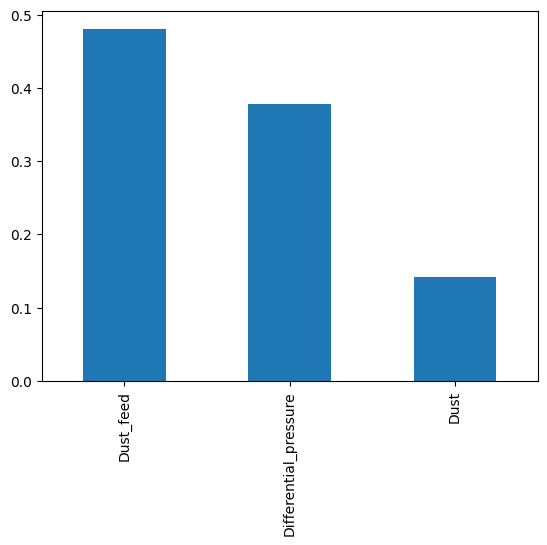

In [115]:
reg_model = RandomForestRegressor(
    criterion='poisson',
    max_features=1.0,
    n_estimators=300,
    )
reg_model.fit(X_train, y_train)
df_feature_importance = pd.Series(reg_model.feature_importances_, index=X_train.columns).nlargest(n_features).index.to_list()
print(f'The {len(best_features)} most important features in descending order. \n'
      f'\nThe above model was trained on the following variables: \n{df_feature_importance}')
feat_importances = (pd.Series(reg_model.feature_importances_, index=X_train.columns)
                    .nlargest(6)
                    .plot(kind='bar'))


# Save files to the repo

We will generate the following files to include in the app

* Train set
* Test set
* Validation set
* Modeling pipeline
* Features importance plot

In [141]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/predict_rul/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

## Train Set: features and target

In [142]:
X_train.head()

,Dust_feed,Differential_pressure,Dust
0,118.214472,51.902490,1.2
1,59.107236,45.301650,1.2
2,79.246266,46.929300,0.9
3,59.107236,23.238570,0.9
4,118.214472,8.951823,1.025


In [143]:
X_train.to_csv(f'{file_path}/X_train.csv', index=False)

In [144]:
y_train

0         85.9
1        169.0
2         62.5
3        178.9
4        101.2
         ...  
24061     69.2
24062     31.4
24063     64.4
24064     11.6
24065    168.5
Name: RUL, Length: 24066, dtype: float64

In [145]:
y_train.to_csv(f'{file_path}/y_train.csv', index=False)

## Test Set: features and target

In [146]:
X_test.head()

,Dust_feed,Differential_pressure,Dust
0,59.107236,367.929000,1.2
1,118.214472,70.077400,1.2
2,59.107236,59.678820,1.025
3,118.214472,8.228443,1.025
4,59.107236,42.860240,1.2


In [147]:
X_test.to_csv(f'{file_path}/X_test.csv', index=False)

In [148]:
y_test

0        44.9
1        81.2
2       148.7
3       116.6
4       197.6
        ...  
8018     31.7
8019     83.2
8020    116.4
8021    255.6
8022    196.5
Name: RUL, Length: 8023, dtype: float64

In [149]:
y_test.to_csv(f'{file_path}/y_test.csv', index=False)

## Validation Set: features and target

In [150]:
X_validate.head()

,Dust_feed,Differential_pressure,Dust
0,158.492533,132.01680,1.025
1,158.492533,21.43012,1.025
2,79.246266,77.03990,0.9
3,158.492533,15.01013,1.025
4,59.107236,16.18562,1.2


In [151]:
X_validate.to_csv(f'{file_path}/X_validate.csv', index=False)

In [152]:
y_validate

0        40.7
1       106.0
2        51.2
3        84.2
4       205.8
        ...  
8018    132.5
8019     26.9
8020    207.4
8021    164.1
8022    112.4
Name: RUL, Length: 8023, dtype: float64

In [153]:
y_validate.to_csv(f'{file_path}/y_validate.csv', index=False)

## Modelling pipeline

ML pipeline for predicting RUL

In [154]:
best_regressor_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6,
                                          variables=['Differential_pressure',
                                                     'Dust_feed'])),
                ('feat_scaling', MinMaxScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=RandomForestRegressor())),
                ('model',
                 RandomForestRegressor(max_features='sqrt', n_estimators=300))])

In [155]:
joblib.dump(value=best_regressor_pipeline, filename=f'{file_path}/rfr_pipeline.pkl')

['outputs/ml_pipeline/predict_rul/v1/rfr_pipeline.pkl']

## Feature importance plot

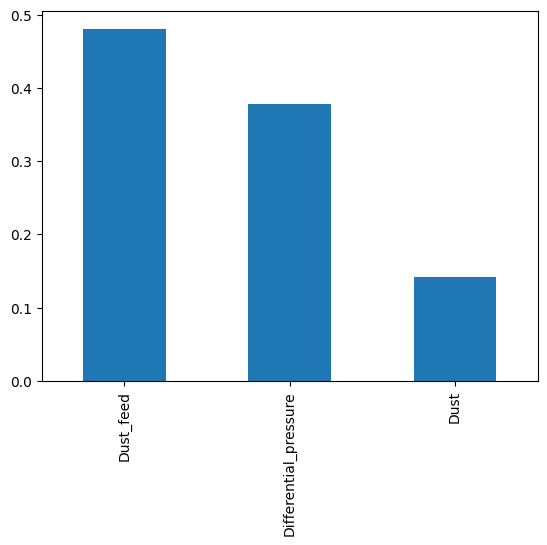

In [156]:
feat_importances = (pd.Series(reg_model.feature_importances_, index=X_train.columns)
                    .nlargest(6)
                    .plot(kind='bar'))
plt.savefig(f'{file_path}/features_importance.png', bbox_inches='tight')
plt.savefig(f'deployed/features_importance.png', bbox_inches='tight')

## Depolyment Dataset

On deplyment to the cloud application platform [Heroku](https://www.heroku.com/) we encountered a problem with the size of the dataset exceeding the **500MB** slug limit.

To combat this we have reduced the dataset from **+40,000** observations to around **1,800**. This will reduce the file size of subsequent `.pkl` and `.csv` files for use within the live application at [maintenance-predictor.herokuapp.com](https://maintenance-predictor.herokuapp.com/)
* As the train, test and validation sets are already randomized, simple division of this into X and y varibles is:
    * df_train_deployed sets = **1,080** observations = 60%
    * df_test_deployed sets = **360** observations = 20%
    * df_validate_deployed sest = **360** observations = 20%

This has the effect of reducing the subsequent `.pkl` file from ± 330 MB to ± 32 MB, allowing demonstration of the model within this cloud app framework.

In [157]:
X_train_deployed = X_train.iloc[0:1080]
y_train_deployed = y_train.iloc[0:1080]
X_test_deployed = X_test.iloc[0:360]
y_test_deployed = y_test.iloc[0:360]
X_validate_deployed = X_validate.iloc[0:360]
y_validate_deployed = y_validate.iloc[0:360]
df_deployed = pd.concat([X_train_deployed, X_test_deployed, X_validate_deployed], ignore_index=True)

print('\n', X_train_deployed.shape, y_train_deployed.shape, '= X and y Train sets\n',
      X_validate_deployed.shape, y_validate_deployed.shape, '= X and y Validate sets\n',
      X_test_deployed.shape, y_test_deployed.shape, '= X and y Test sets\n',
      '===========\n',
      df_deployed.shape[0], '= Total Observations')


 (1080, 3) (1080,) = X and y Train sets
 (360, 3) (360,) = X and y Validate sets
 (360, 3) (360,) = X and y Test sets
 1800 = Total Observations


In [158]:
y_validate_deployed

0       40.7
1      106.0
2       51.2
3       84.2
4      205.8
       ...  
355    239.3
356    218.6
357    266.9
358     32.2
359     32.8
Name: RUL, Length: 360, dtype: float64

Re-run the Mini Model

In [159]:
search_deployed = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search_deployed.fit(X_train_deployed, y_train_deployed, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [160]:
scaler = MinMaxScaler()
scaler.fit(X_train_deployed, y_train_deployed)

MinMaxScaler()

In [161]:
X_train

,Dust_feed,Differential_pressure,Dust
0,118.214472,51.902490,1.2
1,59.107236,45.301650,1.2
2,79.246266,46.929300,0.9
3,59.107236,23.238570,0.9
4,118.214472,8.951823,1.025
...,...,...,...
24061,237.738799,1.808449,1.025
24062,158.492533,136.176200,0.9
24063,158.492533,112.485500,1.025
24064,59.107236,533.854200,1.025


Create the supporting files

In [162]:
grid_search_summary_deployed, grid_search_pipeline_deployed = search_deployed.score_summary(sort_by='mean_score (R²)')
best_model_deployed = grid_search_summary_deployed.iloc[0,0]
best_regressor_pipeline_deployed = grid_search_pipeline_deployed[best_model_deployed].best_estimator_

### Save Reoprt as Image File
There was an issue with the running of the funciton of the `regression_evaluation()` in the streamlit application. 

The Following **regression evaluation picture saving** function was created to export these reports as a file that can be viewed in streamlit:

In [163]:
def reg_eval_pic(X, y, pipeline, file_path):
    plt.figure(dpi=180)
    prediction = pipeline.predict(X)
    r2 = 'R² Score: ' + str(round(r2_score(y, prediction),4)).replace("''",' ')
    mae = 'Mean Absolute Error: ' + str(round(mean_absolute_error(y, prediction),4)).replace("''",' ')
    medae = 'Median Absolute Error: ' + str(round(median_absolute_error(y, prediction),4)).replace("''",' ')
    mse = 'Mean Squared Error: ' + str(round(mean_squared_error(y, prediction),4)).replace("''",' ')
    rmse = 'Root Mean Squared Error: ' + str(round(np.sqrt(mean_squared_error(y, prediction)),4)).replace("''",' ')
    array = r2 + ' \n' + mae + ' \n' + medae + ' \n' + mse + ' \n' + rmse + ' \n'
    plt.text(0,1,str(array))
    plt.axis('off')
    plt.savefig(file_path, bbox_inches='tight')


Input the data for each set

Train Set Summary Saved.
Test Set Summary Saved.
Validation Set Summary Saved.


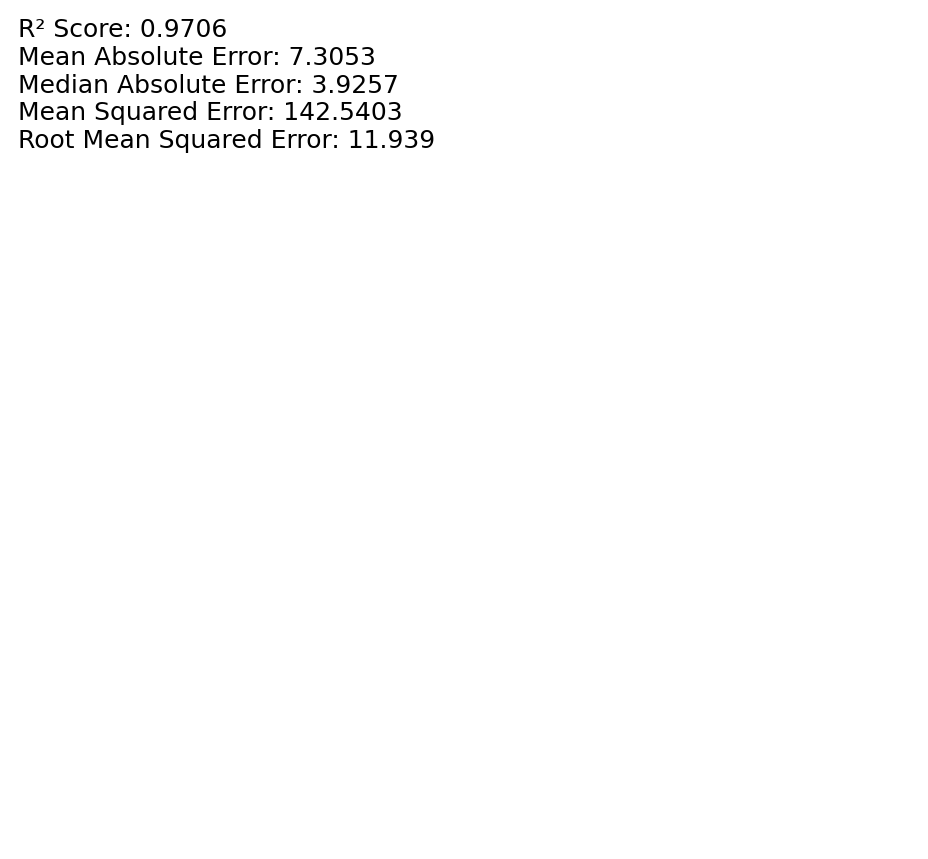

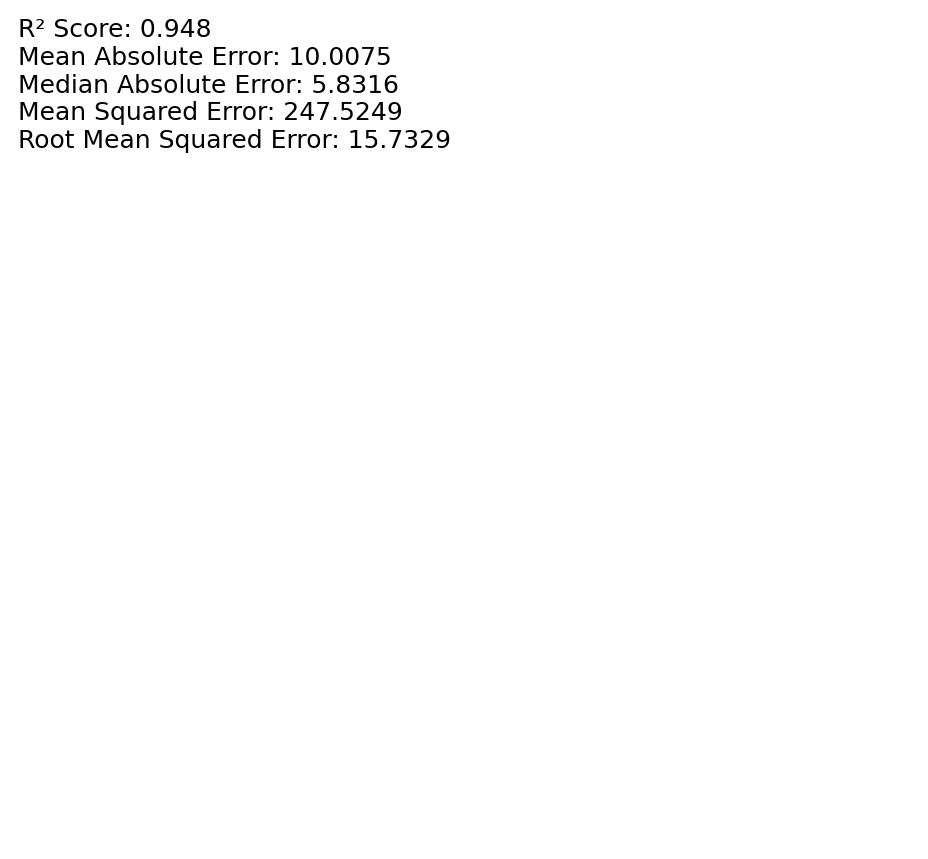

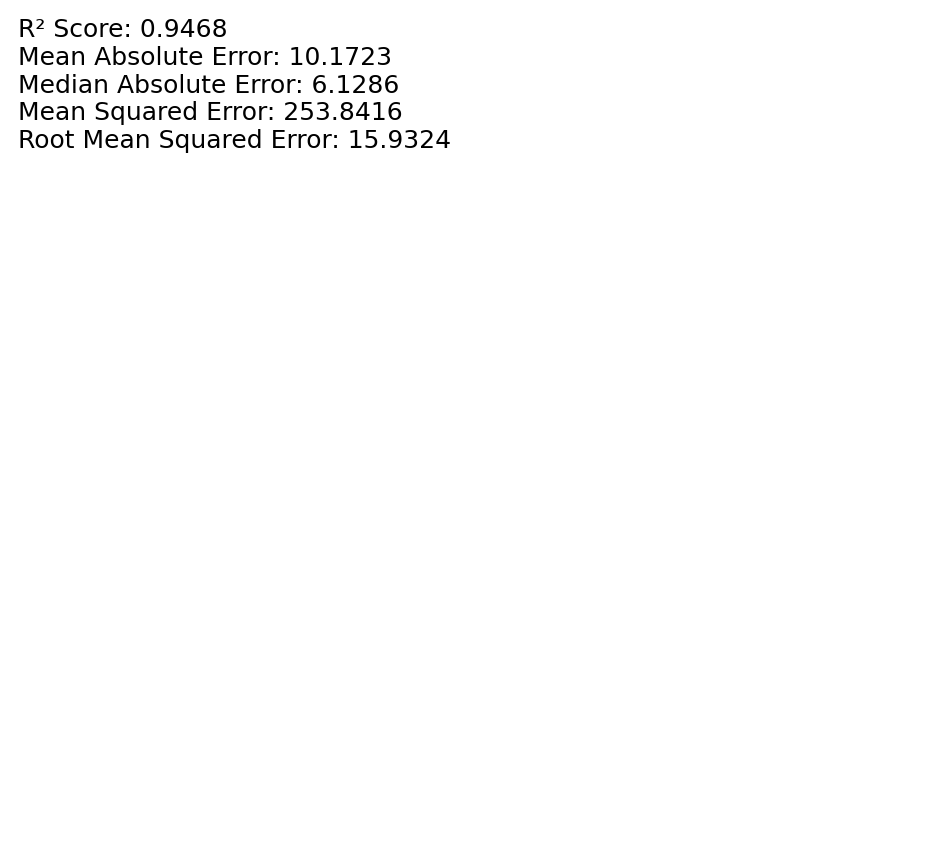

In [164]:
reg_eval_pic(X_train, y_train, best_regressor_pipeline, 'deployed/reg_eval_pic_train.png')
print('Train Set Summary Saved.')

reg_eval_pic(X_test, y_test, best_regressor_pipeline, 'deployed/reg_eval_pic_test.png')
print('Test Set Summary Saved.')

reg_eval_pic(X_validate, y_validate, best_regressor_pipeline, 'deployed/reg_eval_pic_validate.png')
print('Validation Set Summary Saved.')

### Save Databases to the directory accessible by the app

In [165]:
X_train_deployed.to_csv(f'deployed/X_train_deployed.csv', index=False)
y_train_deployed.to_csv(f'deployed/y_train_deployed.csv', index=False)
X_test_deployed.to_csv(f'deployed/X_test_deployed.csv', index=False)
y_test_deployed.to_csv(f'deployed/y_test_deployed.csv', index=False)
X_validate_deployed.to_csv(f'deployed/X_validate_deployed.csv', index=False)
y_validate_deployed.to_csv(f'deployed/y_validate_deployed.csv', index=False)
joblib.dump(value=best_regressor_pipeline_deployed, filename=f'deployed/rfr_pipeline.pkl')
joblib.dump(value=scaler, filename=f'deployed/scaler.pkl')

['deployed/scaler.pkl']

C'est Fini

---